# Project Title : Telco-Customer-Churn Prediction using Machine Learning 
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. gender
2. customerID
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. DeviceProtection
10. TechSupport
11. StreamingTV
12. StreamingMovies
13. PaperlessBilling
14. TotalCharges
## Ordinal :
15. Contract


## DISCRETE: 
16. SeniorCitizen

## Continuoue
17. MonthlyCharges
18. TotalCharges

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [12]:
import xgboost as xgb

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
import seaborn as sns

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
import pickle

In [18]:
from sklearn.model_selection import KFold,cross_val_score

In [19]:
df=pd.read_csv('Telco-Customer-Churn.csv')


In [20]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='gender', ylabel='count'>

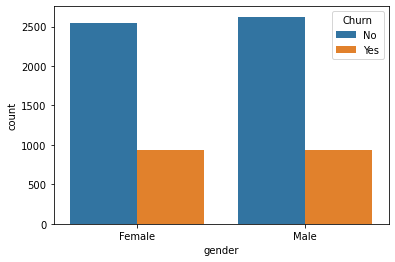

In [24]:
sns.countplot(x='gender',data=df,hue='Churn')

In [25]:
label_df=df.groupby(["gender","Churn"]).size().sort_values().index

In [26]:
val_df=df.groupby(["gender","Churn"]).size().sort_values().values

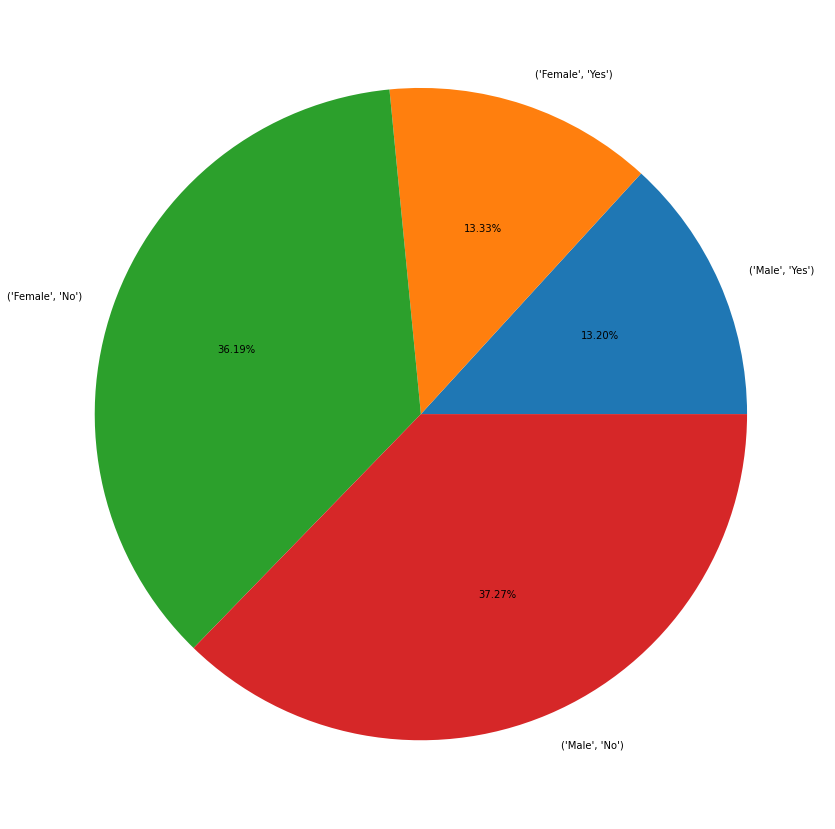

In [27]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Male customers do less churn as compare to Female customers 
2. Female customers do more churn as comapred to Female customers

In [28]:
df.groupby(["gender","Churn"]).size()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

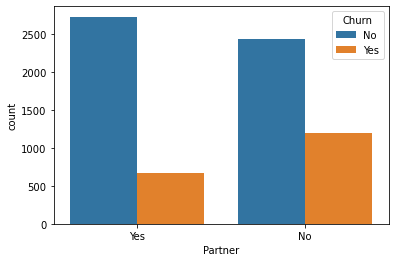

In [29]:
sns.countplot(x='Partner',hue='Churn',data=df)

In [30]:
label_df=df.groupby(["Partner","Churn"]).size().sort_values().index

In [31]:
val_df=df.groupby(["Partner","Churn"]).size().sort_values().values

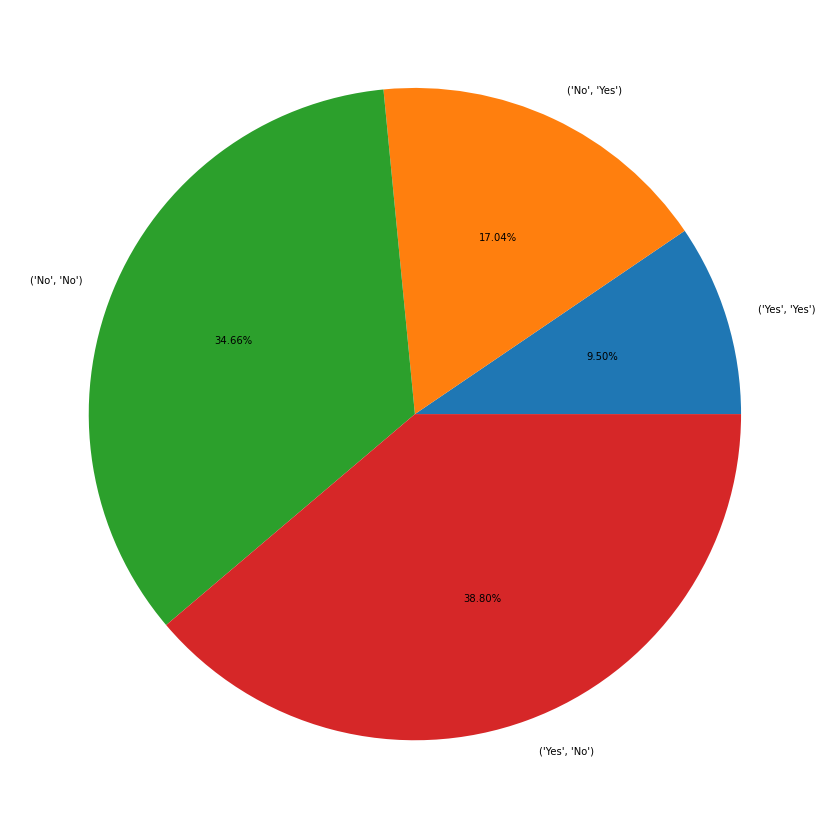

In [32]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having partner do minimum churn.
2. Customers having no partner do maximum churn.

In [33]:
df.groupby("Partner")['Churn'].value_counts()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

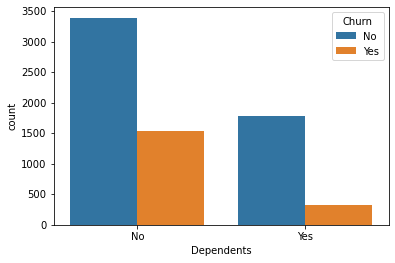

In [34]:
sns.countplot(x=df['Dependents'],hue=df['Churn'])

In [35]:
df.groupby(["Dependents","Churn"]).size()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
dtype: int64

In [36]:
label_df=df.groupby(["Dependents","Churn"]).size().sort_values().index

In [37]:
val_df=df.groupby(["Dependents","Churn"]).size().sort_values().values

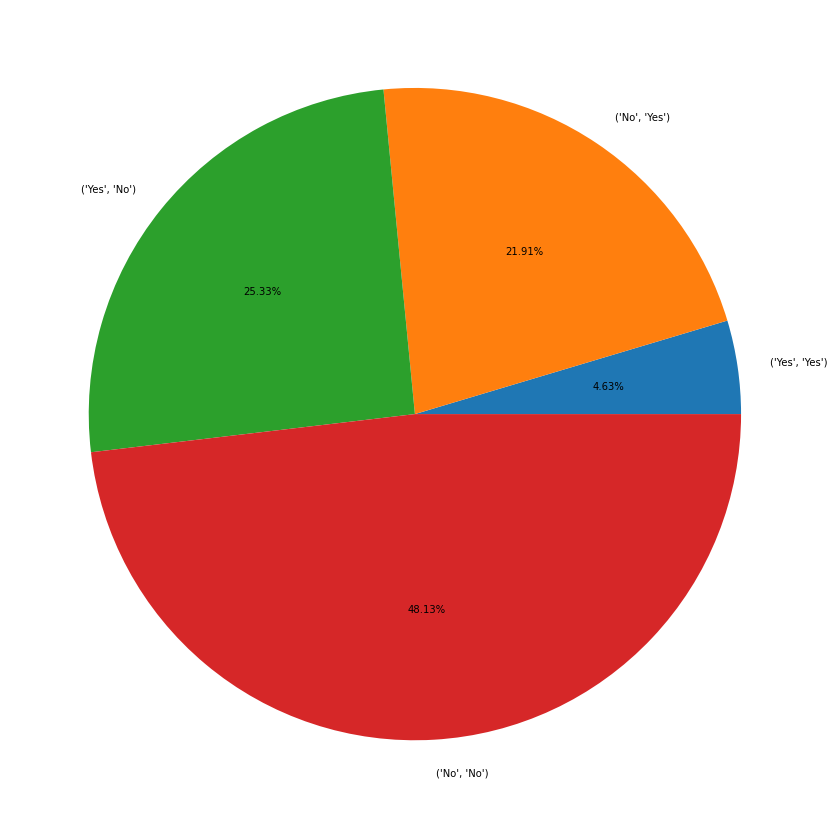

In [38]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who don't have dependents do minimum and maximum churn.

<AxesSubplot:xlabel='tenure', ylabel='count'>

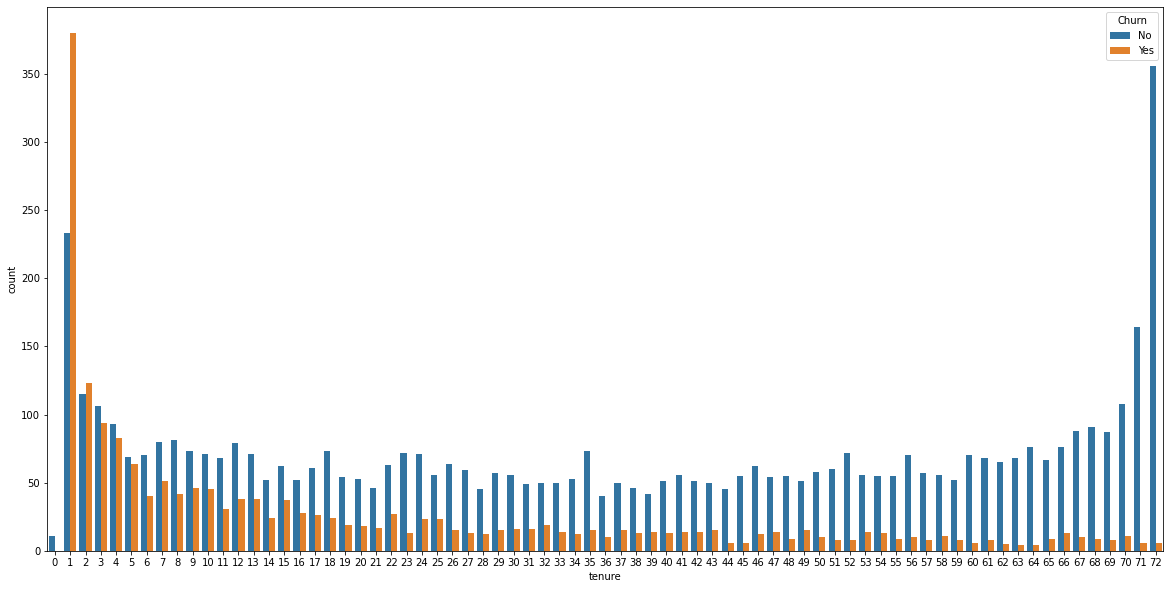

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['tenure'],hue=df['Churn'])


In [40]:
df.groupby("tenure")['Churn'].value_counts()

tenure  Churn
0       No        11
1       Yes      380
        No       233
2       Yes      123
        No       115
                ... 
70      Yes       11
71      No       164
        Yes        6
72      No       356
        Yes        6
Name: Churn, Length: 145, dtype: int64

In [41]:
label_df=df.groupby(["tenure","Churn"]).size().sort_values().index

In [42]:
val_df=df.groupby(["tenure","Churn"]).size().sort_values().values

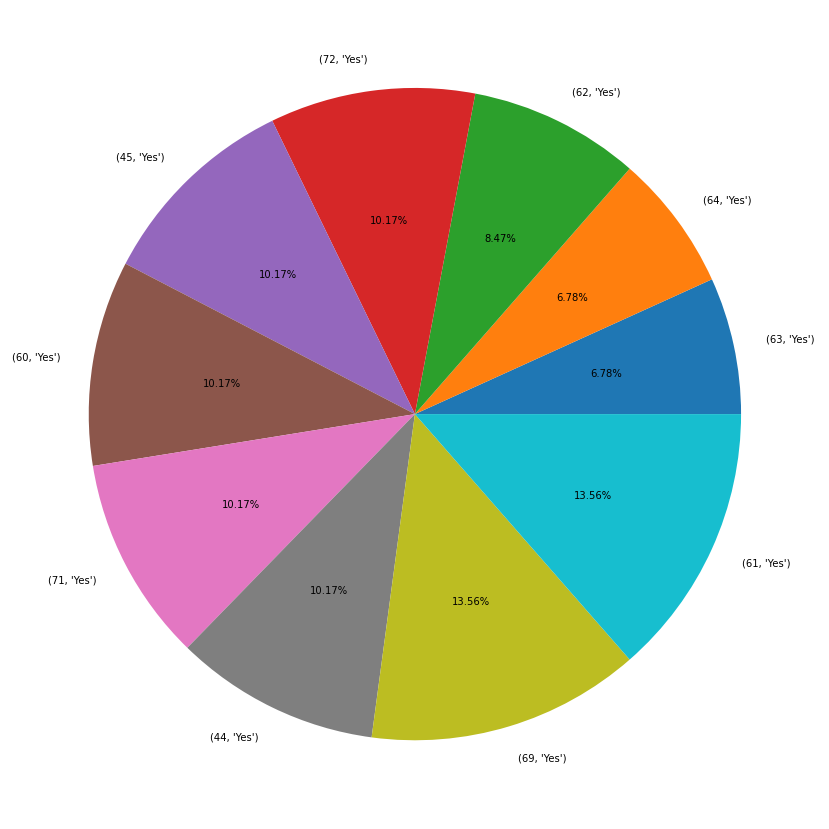

In [43]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have tenure of 1 months do maximum churn
2. Customers who have tenure of 72 months do minimum churn

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

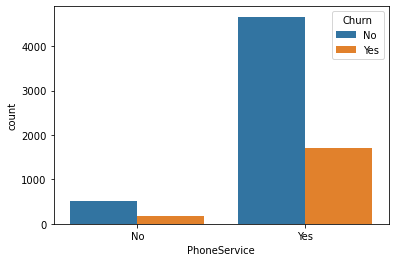

In [44]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

In [45]:
df.groupby("PhoneService")['Churn'].value_counts()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

In [46]:
label_df=df.groupby(["PhoneService","Churn"]).size().sort_values().index

In [47]:
val_df=df.groupby(["PhoneService","Churn"]).size().sort_values().values

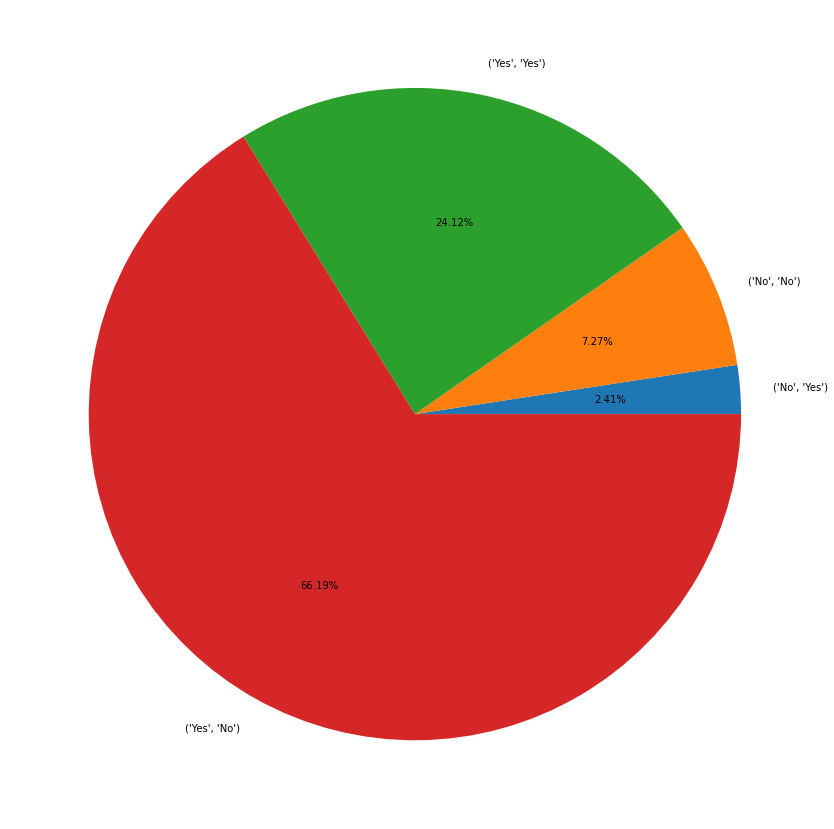

In [48]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have PhoneService do minimum churn.
2. Customers who have PhoneService do maximum churn.


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

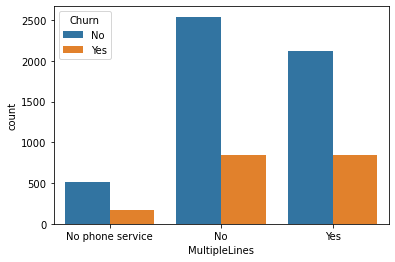

In [49]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

In [50]:
df.groupby("MultipleLines")['Churn'].value_counts()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

In [51]:
label_df=df.groupby(["MultipleLines","Churn"]).size().sort_values().index

In [52]:
val_df=df.groupby(["MultipleLines","Churn"]).size().sort_values().values

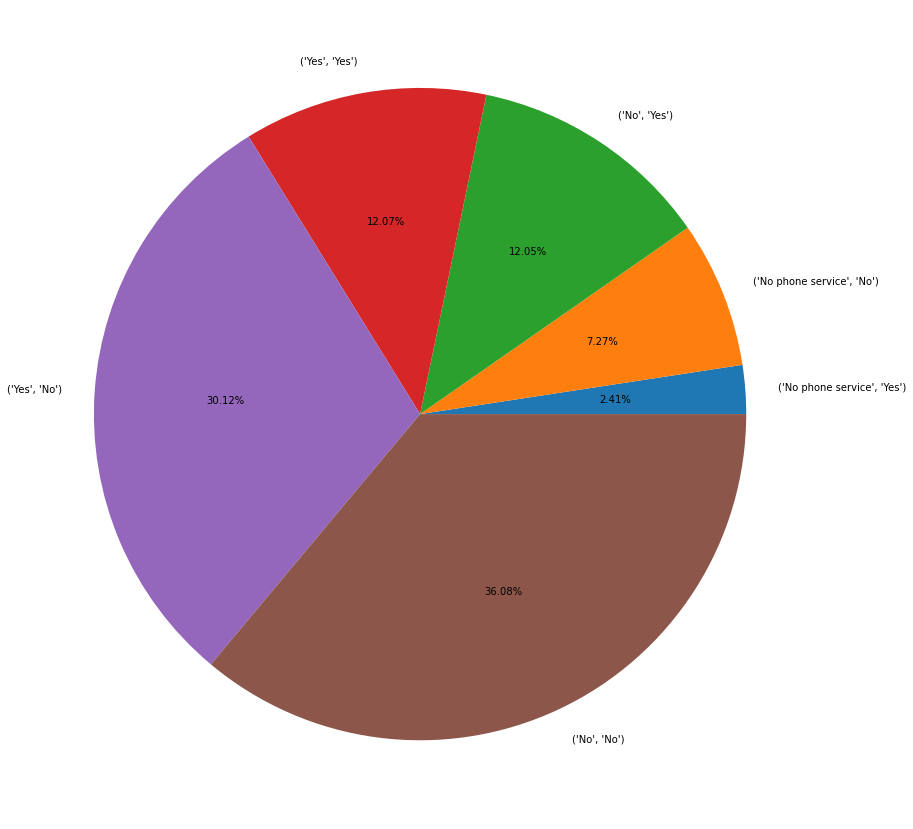

In [53]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who don't have MultipleLines Service do minimum churn
2. Customers who  have MultipleLines Service do maximum churn


<AxesSubplot:xlabel='InternetService', ylabel='count'>

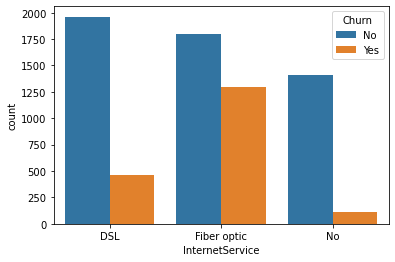

In [54]:
sns.countplot(x='InternetService',hue='Churn',data=df)

In [55]:
df.groupby("InternetService")['Churn'].value_counts()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64

In [56]:
label_df=df.groupby(["InternetService","Churn"]).size().sort_values().index

In [57]:
val_df=df.groupby(["InternetService","Churn"]).size().sort_values().values

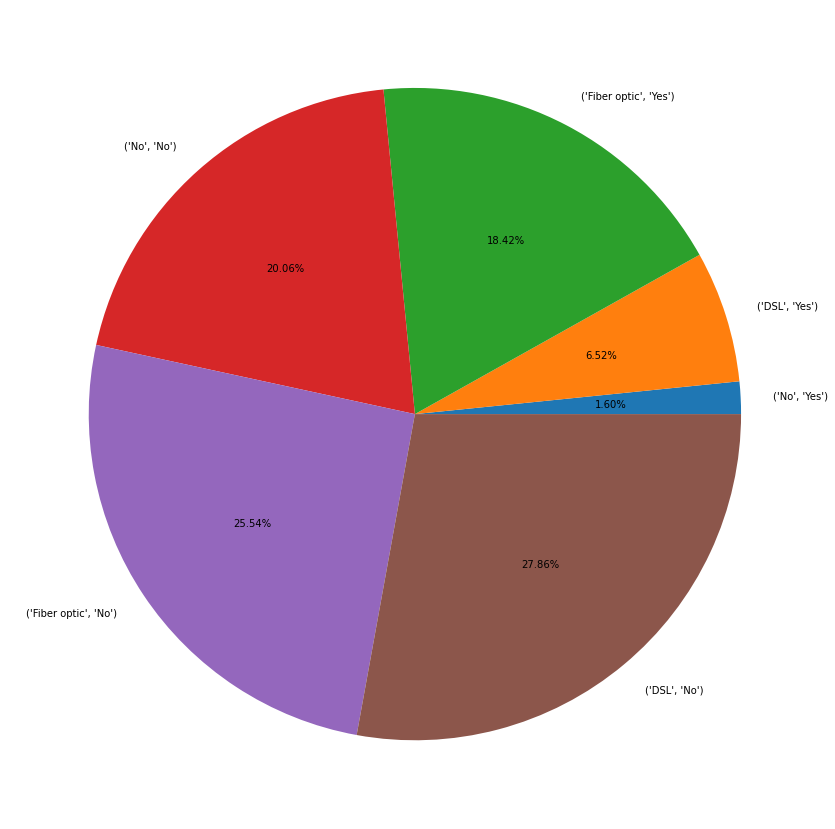

In [58]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having DSL internet service do minimum churn
2. Customer having Fiber Optic service do maximum churn

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

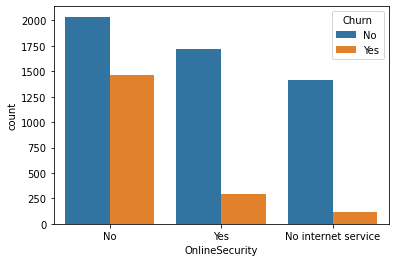

In [59]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)

In [60]:
df.groupby("OnlineSecurity")['Churn'].value_counts()

OnlineSecurity       Churn
No                   No       2037
                     Yes      1461
No internet service  No       1413
                     Yes       113
Yes                  No       1724
                     Yes       295
Name: Churn, dtype: int64

In [61]:
label_df=df.groupby(["OnlineSecurity","Churn"]).size().sort_values().index

In [62]:
val_df=df.groupby(["OnlineSecurity","Churn"]).size().sort_values().values

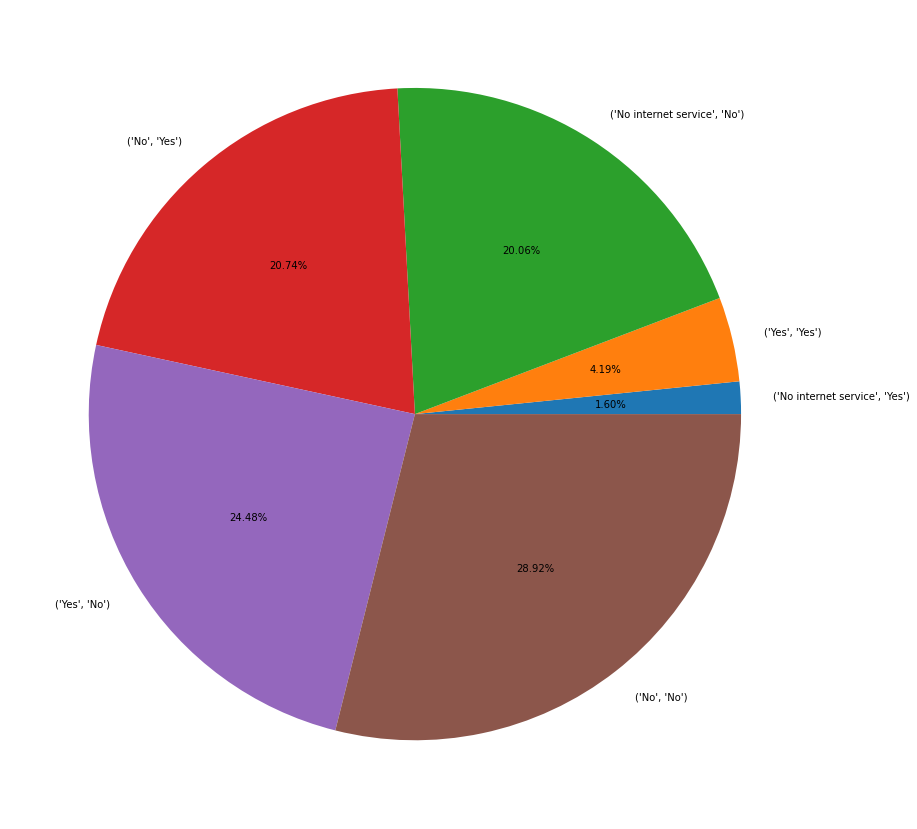

In [63]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having no OnlineSecurity do minimum churn
2. Customers having no OnlineSecurity do maximum churn

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

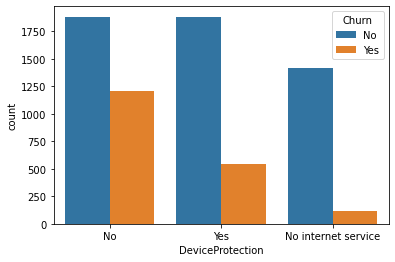

In [64]:
sns.countplot(x='DeviceProtection',hue='Churn',data=df)

In [65]:
df.groupby("DeviceProtection")['Churn'].value_counts()

DeviceProtection     Churn
No                   No       1884
                     Yes      1211
No internet service  No       1413
                     Yes       113
Yes                  No       1877
                     Yes       545
Name: Churn, dtype: int64

In [66]:
label_df=df.groupby(["DeviceProtection","Churn"]).size().sort_values().index

In [67]:
val_df=df.groupby(["DeviceProtection","Churn"]).size().sort_values().values

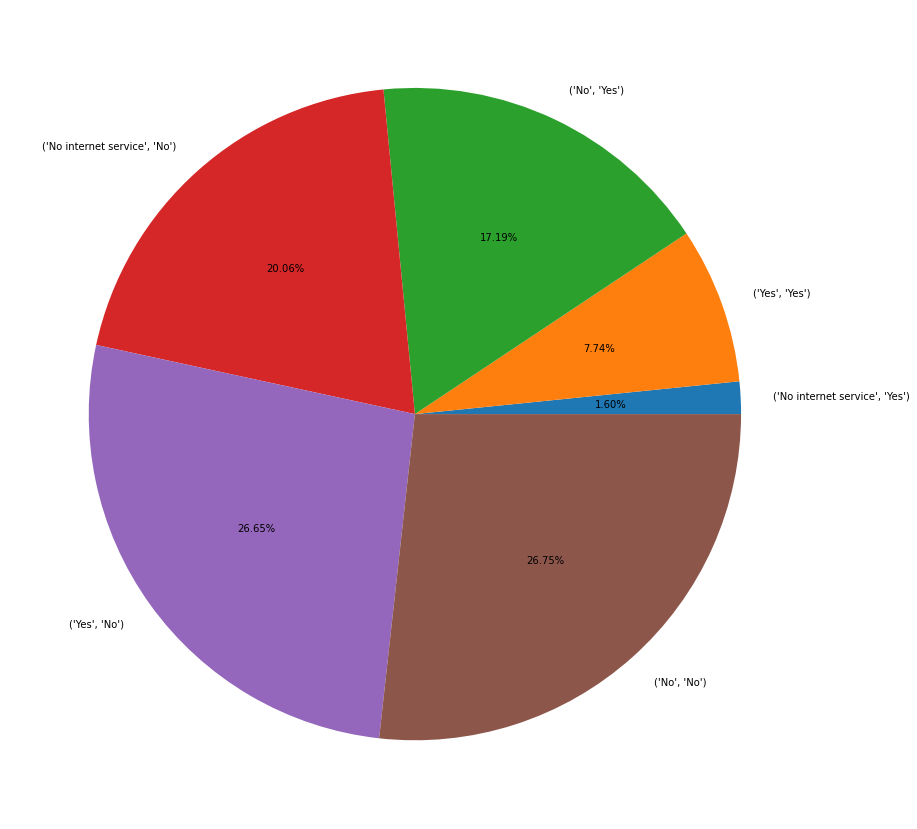

In [68]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having no DeviceProtection do minimum churn
2. Customers having no DeviceProtection do maximum churn

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

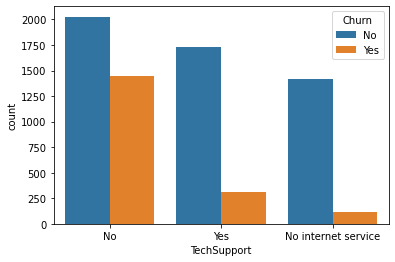

In [69]:
sns.countplot(x='TechSupport',hue='Churn',data=df)

In [70]:
df.groupby("TechSupport")['Churn'].value_counts()

TechSupport          Churn
No                   No       2027
                     Yes      1446
No internet service  No       1413
                     Yes       113
Yes                  No       1734
                     Yes       310
Name: Churn, dtype: int64

In [71]:
label_df=df.groupby(["TechSupport","Churn"]).size().sort_values().index

In [72]:
val_df=df.groupby(["TechSupport","Churn"]).size().sort_values().values

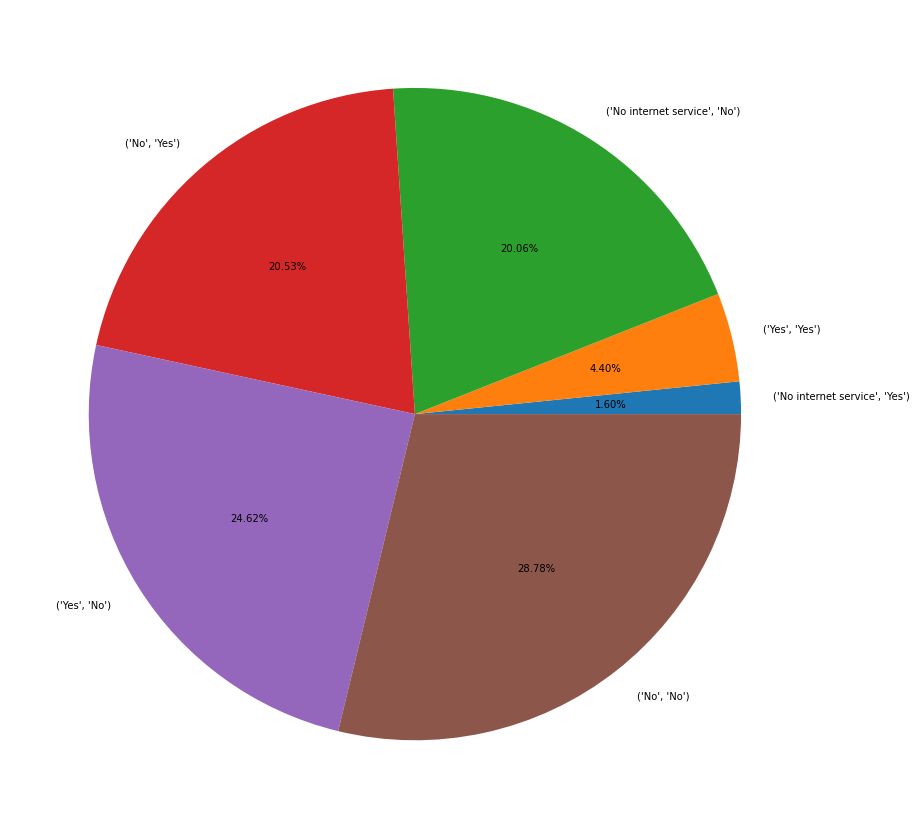

In [73]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having no TechSupport do minimum churn
2. Customers having no TechSupport do maximum churn

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

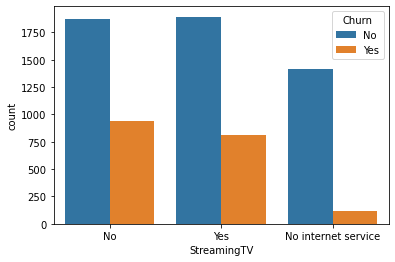

In [74]:
sns.countplot(x=df['StreamingTV'],hue=df['Churn'])

In [75]:
df.groupby("StreamingTV")['Churn'].value_counts()

StreamingTV          Churn
No                   No       1868
                     Yes       942
No internet service  No       1413
                     Yes       113
Yes                  No       1893
                     Yes       814
Name: Churn, dtype: int64

In [76]:
label_df=df.groupby(["StreamingTV","Churn"]).size().sort_values().index

In [77]:
val_df=df.groupby(["StreamingTV","Churn"]).size().sort_values().values

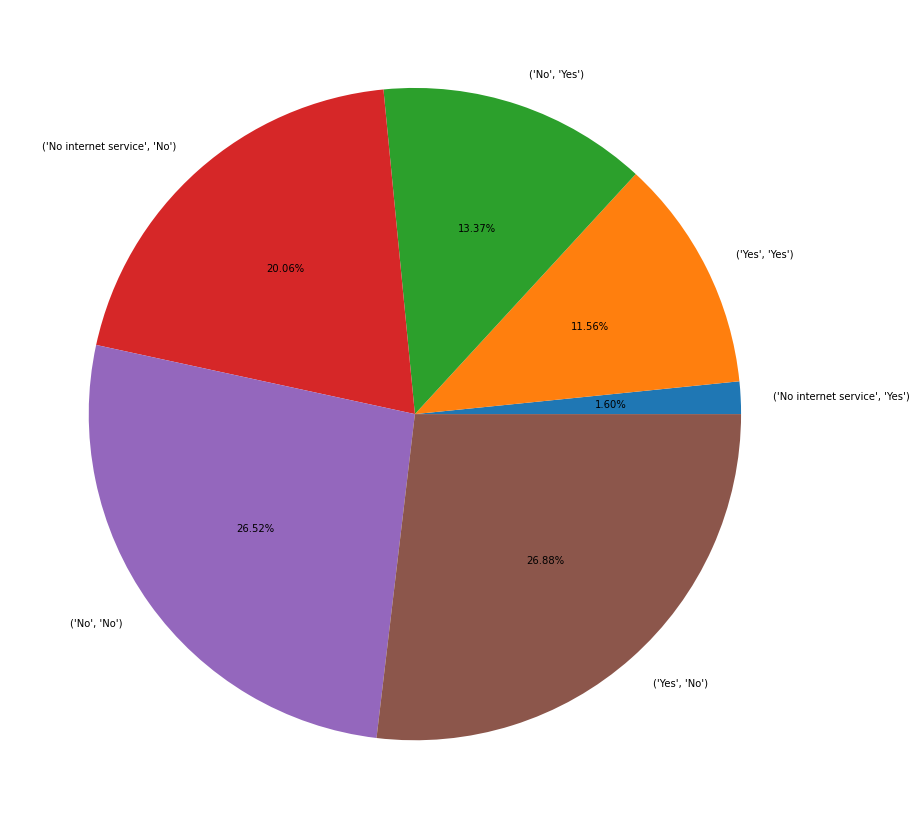

In [78]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having  StreamingTV do minimum churn
2. Customers having no StreamingTV do maximum churn

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

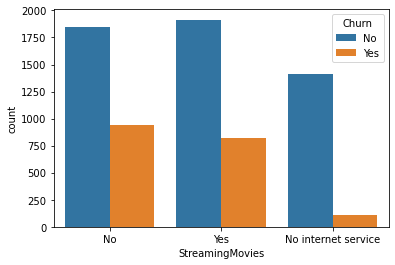

In [79]:
sns.countplot(x=df['StreamingMovies'],hue=df['Churn'])

In [80]:
df.groupby("StreamingMovies")['Churn'].value_counts()

StreamingMovies      Churn
No                   No       1847
                     Yes       938
No internet service  No       1413
                     Yes       113
Yes                  No       1914
                     Yes       818
Name: Churn, dtype: int64

In [81]:
label_df=df.groupby(["StreamingMovies","Churn"]).size().sort_values().index

In [82]:
val_df=df.groupby(["StreamingMovies","Churn"]).size().sort_values().values

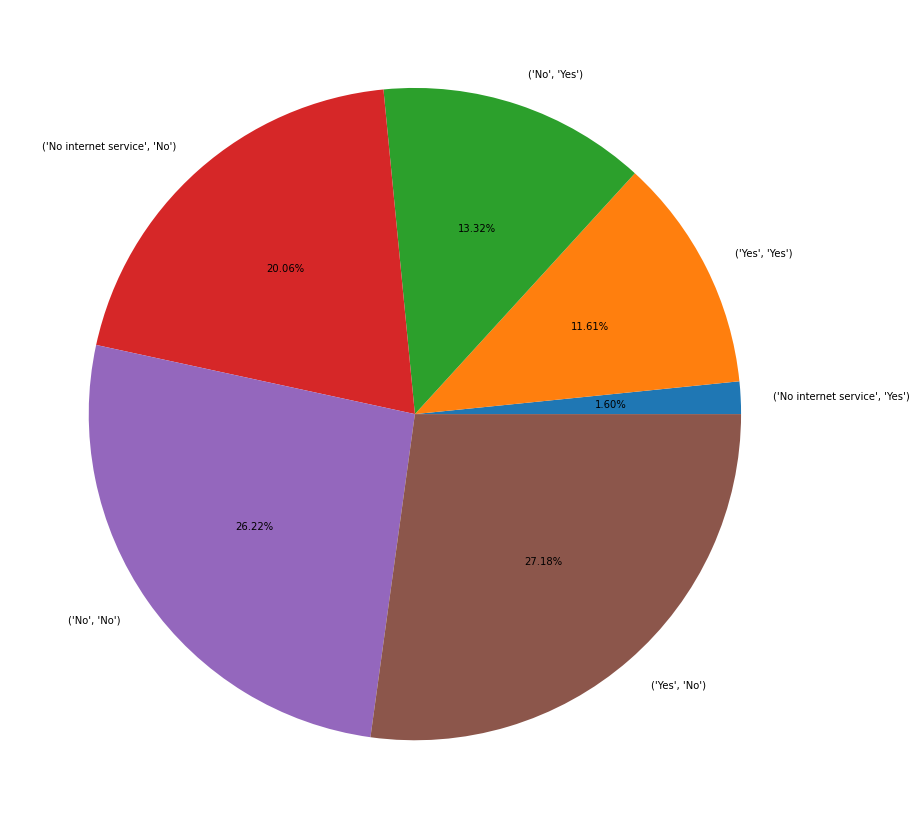

In [83]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having  StreamingMovies do minimum churn
2. Customers having no StreamingMovies do maximum churn

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

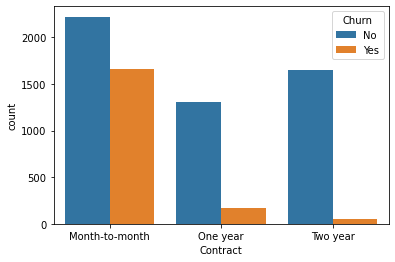

In [84]:
sns.countplot(df['Contract'],hue=df['Churn'])

In [85]:
df.groupby("Contract")['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

In [86]:
label_df=df.groupby(["Contract","Churn"]).size().sort_values().index

In [87]:
val_df=df.groupby(["Contract","Churn"]).size().sort_values().values

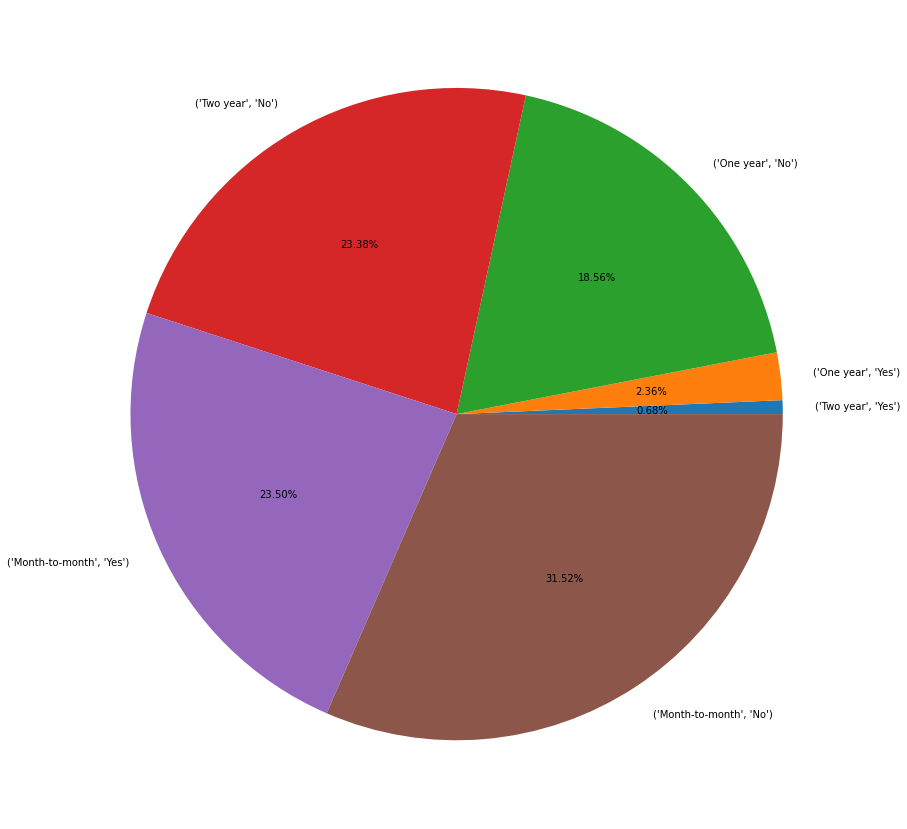

In [88]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having  Contract month-to-month do minimum churn
2. Customers having  Contract month-to-month do maximum churn

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

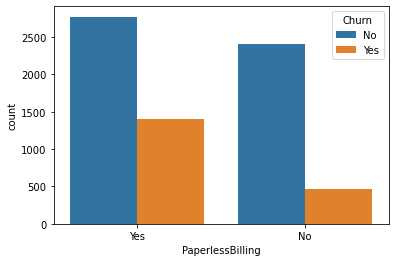

In [89]:
sns.countplot(df['PaperlessBilling'],hue=df['Churn'])

In [90]:
df.groupby("PaperlessBilling")['Churn'].value_counts()

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: Churn, dtype: int64

# Observations:
1. Customers having PaperlessBilling do minimum churn
2. Customers having PaperlessBilling do maximum churn

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

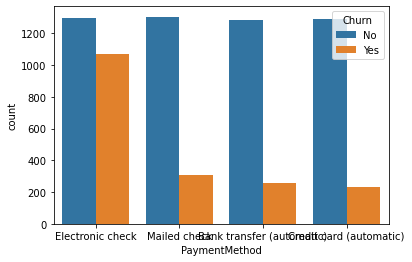

In [91]:
sns.countplot(df['PaymentMethod'],hue=df['Churn'])

In [92]:
label_df=df.groupby(["PaymentMethod","Churn"]).size().sort_values().index

In [93]:
val_df=df.groupby(["PaymentMethod","Churn"]).size().sort_values().values

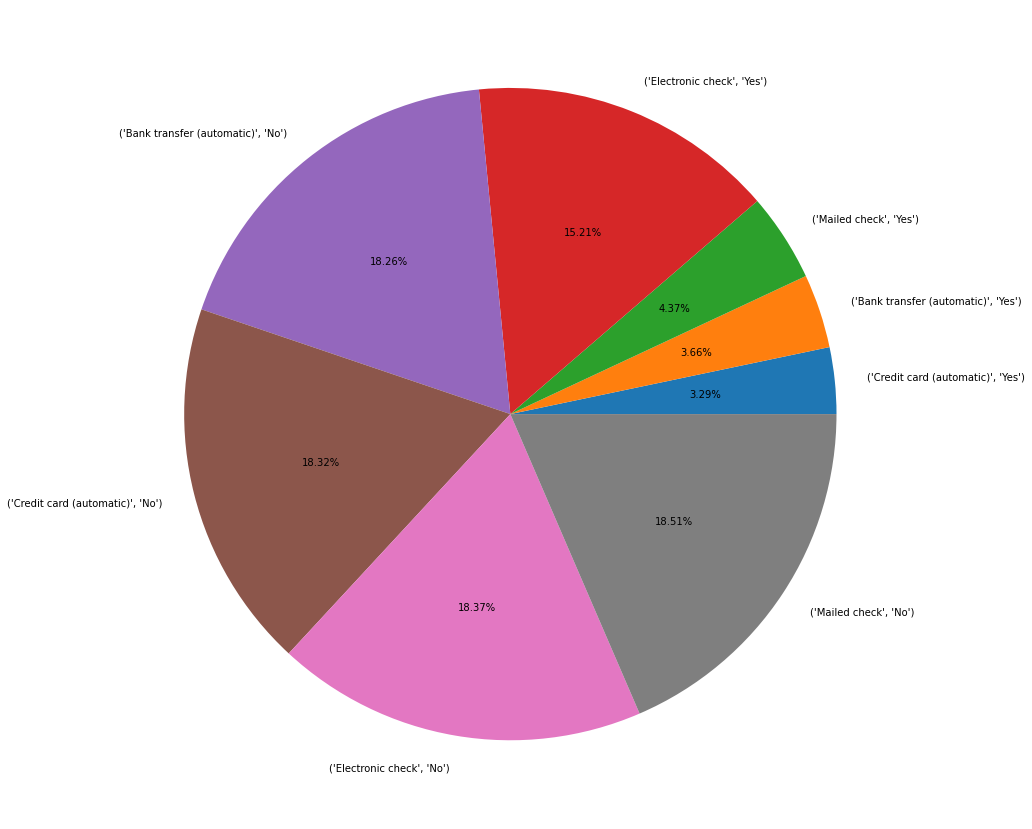

In [94]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [95]:
df.groupby("PaymentMethod")['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: Churn, dtype: int64

# Observations:
1. Customers having mailed check do minimum churn
2. Customers having Electronic check do maximum churn

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

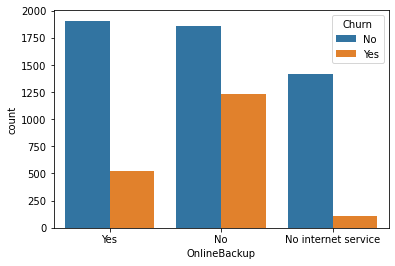

In [96]:
sns.countplot(x=df['OnlineBackup'],hue=df['Churn'])

In [97]:
df.groupby("OnlineBackup")['Churn'].value_counts()

OnlineBackup         Churn
No                   No       1855
                     Yes      1233
No internet service  No       1413
                     Yes       113
Yes                  No       1906
                     Yes       523
Name: Churn, dtype: int64

In [98]:
label_df=df.groupby(["OnlineBackup","Churn"]).size().sort_values().index

In [99]:
val_df=df.groupby(["OnlineBackup","Churn"]).size().sort_values().values

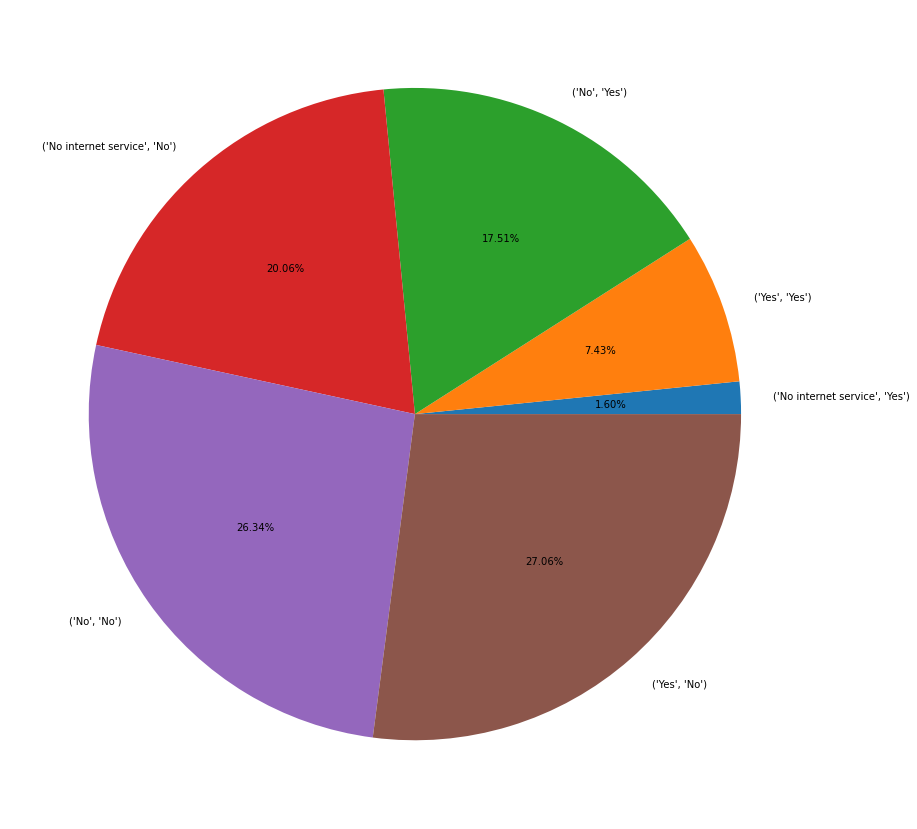

In [100]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers having OnlineBackup do minimum churn
2. Customers having no OnlineBackup do maximum churn

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

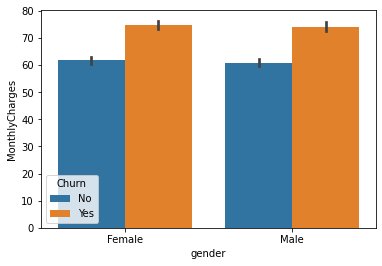

In [101]:
sns.barplot(x='gender',y='MonthlyCharges',data=df,hue='Churn')

In [102]:
df.groupby(["gender","Churn"])['MonthlyCharges'].mean()

gender  Churn
Female  No       61.664908
        Yes      74.812087
Male    No       60.876914
        Yes      74.066989
Name: MonthlyCharges, dtype: float64

In [103]:
label_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values().index

In [104]:
val_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values().values

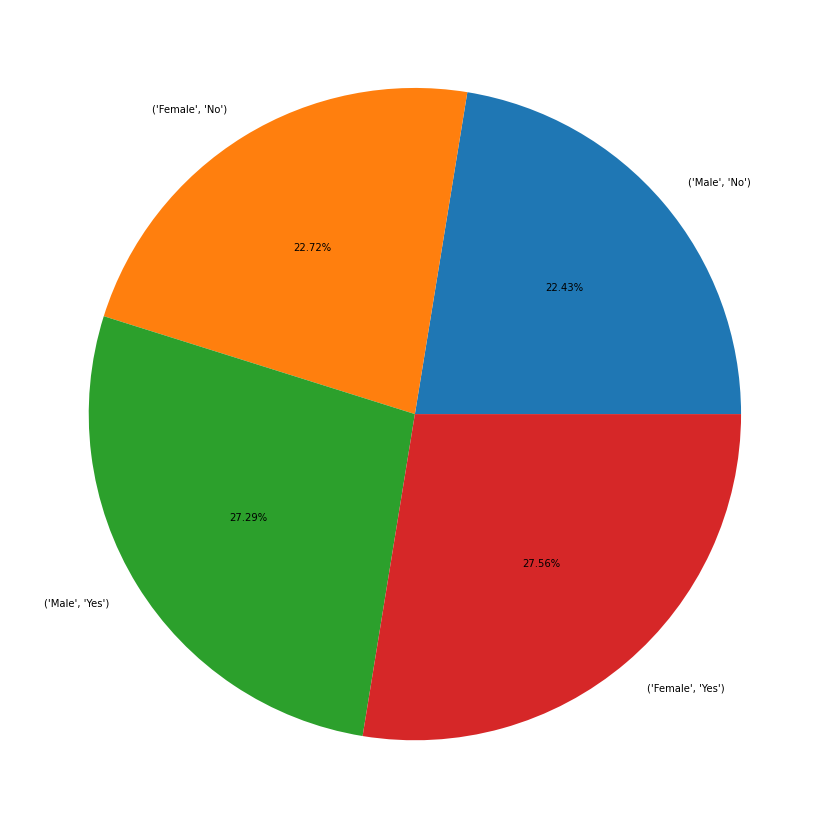

In [105]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers do maximum churn
2. Female Customers do minimum churn


<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

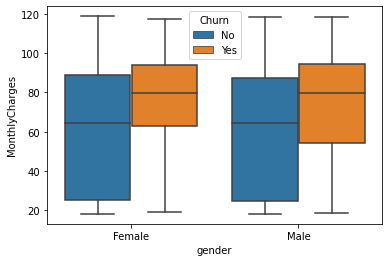

In [106]:
sns.boxplot(x=df['gender'],y=df['MonthlyCharges'],hue=df['Churn'])

In [107]:
label_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values().index

In [108]:
val_df=df.groupby(["gender","Churn"])['MonthlyCharges'].mean().sort_values().values

# Observations:
1. Female Customers do maximum churn
2. Female Customers do minimum churn


<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

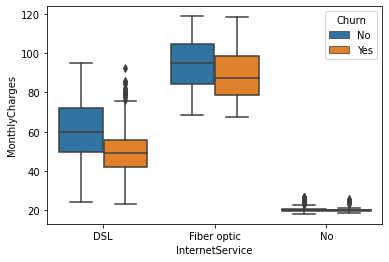

In [109]:
sns.boxplot(x=df['InternetService'],y=df['MonthlyCharges'],hue=df['Churn'])

In [110]:
df.groupby(["InternetService","Churn"])['MonthlyCharges'].mean()

InternetService  Churn
DSL              No       60.212105
                 Yes      49.083224
Fiber optic      No       93.932379
                 Yes      88.126484
No               No       21.136058
                 Yes      20.368142
Name: MonthlyCharges, dtype: float64

In [111]:
label_df=df.groupby(["InternetService","Churn"])['MonthlyCharges'].mean().sort_values().index

In [112]:
val_df=df.groupby(["InternetService","Churn"])['MonthlyCharges'].mean().sort_values().values

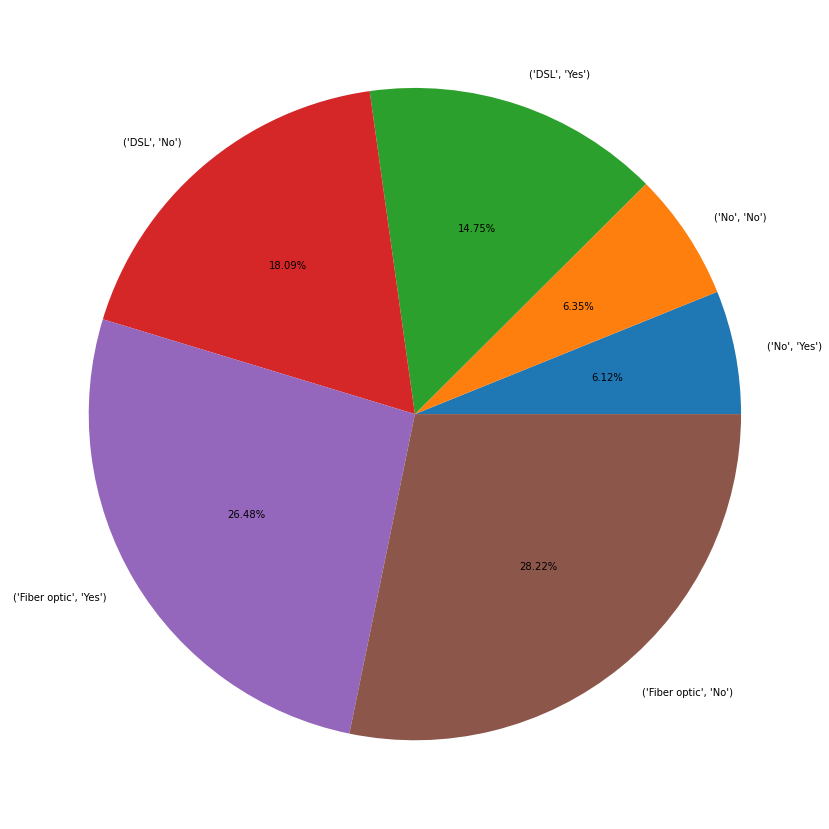

In [113]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Avg Monthly charges for Fiber optic is more as compared to DSL
2. Avg Monthly charges for churn customers are low as compared to non-churn customers for DSL
3. Avg Monthly charges for churn customers are low as compared to non-churn customers for Fiber optic


<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

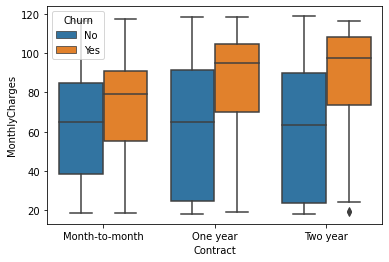

In [114]:
sns.boxplot(x=df['Contract'],y=df['MonthlyCharges'],hue=df['Churn'])

In [115]:
df.groupby(["Contract","Churn"])['MonthlyCharges'].mean()

Contract        Churn
Month-to-month  No       61.462635
                Yes      73.019396
One year        No       62.508148
                Yes      85.050904
Two year        No       60.012477
                Yes      86.777083
Name: MonthlyCharges, dtype: float64

In [116]:
label_df=df.groupby(["Contract","Churn"])['MonthlyCharges'].mean().sort_values().index

In [117]:
val_df=df.groupby(["Contract","Churn"])['MonthlyCharges'].mean().sort_values().values

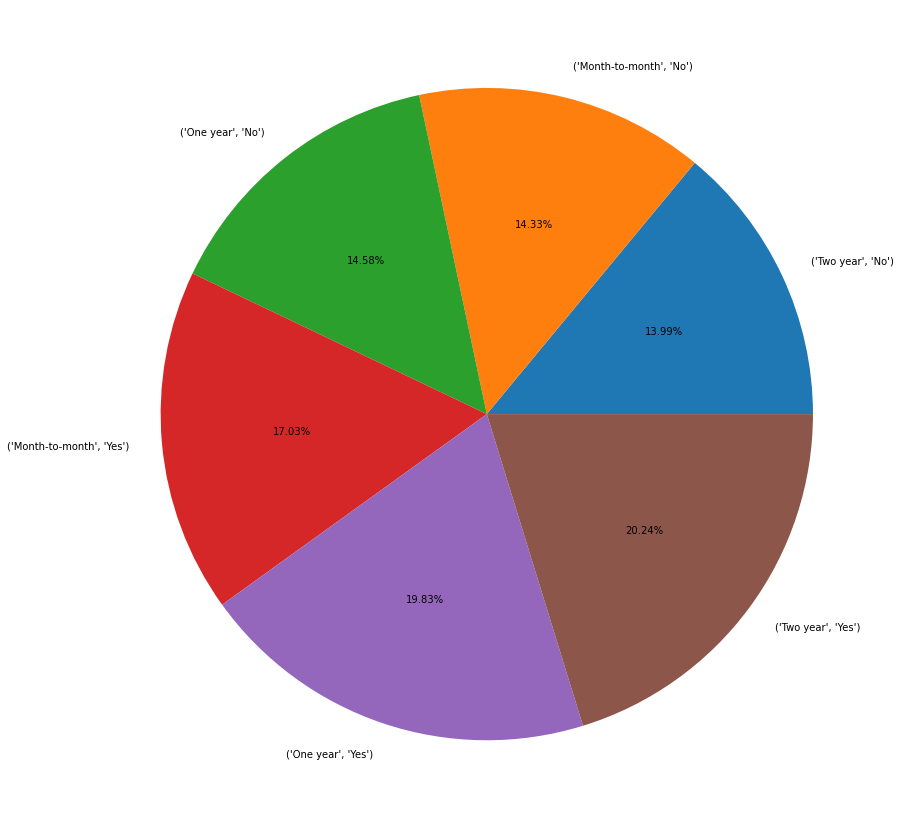

In [118]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Avg Monthly charges for two year contract who churn is maximum : 86.777083
2. Avg Monthly charges for month-to-month contract who do not churn is minimum : 61.462635



<AxesSubplot:xlabel='PaymentMethod', ylabel='MonthlyCharges'>

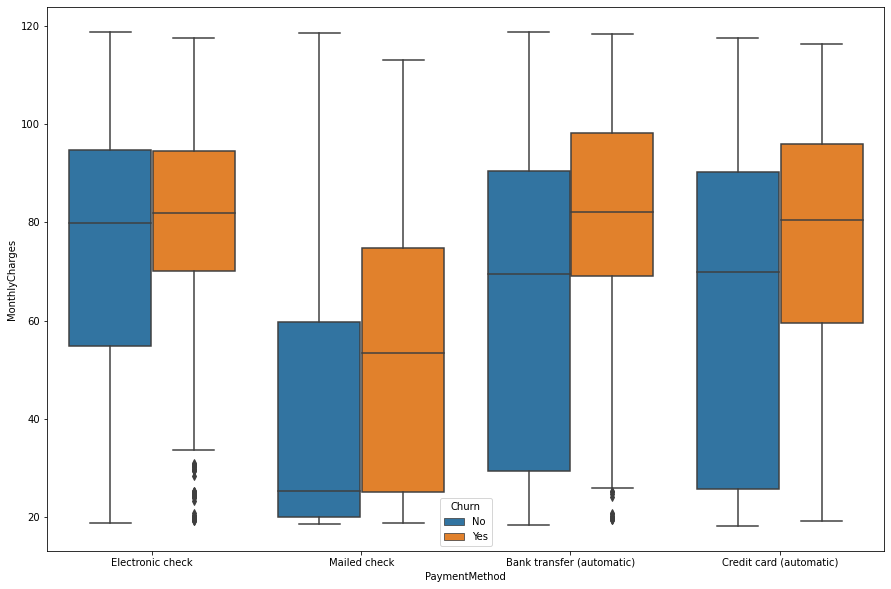

In [119]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['PaymentMethod'],y=df['MonthlyCharges'],hue=df['Churn'])

In [120]:
label_df=df.groupby(["PaymentMethod","Churn"])['MonthlyCharges'].mean().sort_values().index

In [121]:
val_df=df.groupby(["PaymentMethod","Churn"])['MonthlyCharges'].mean().sort_values().values

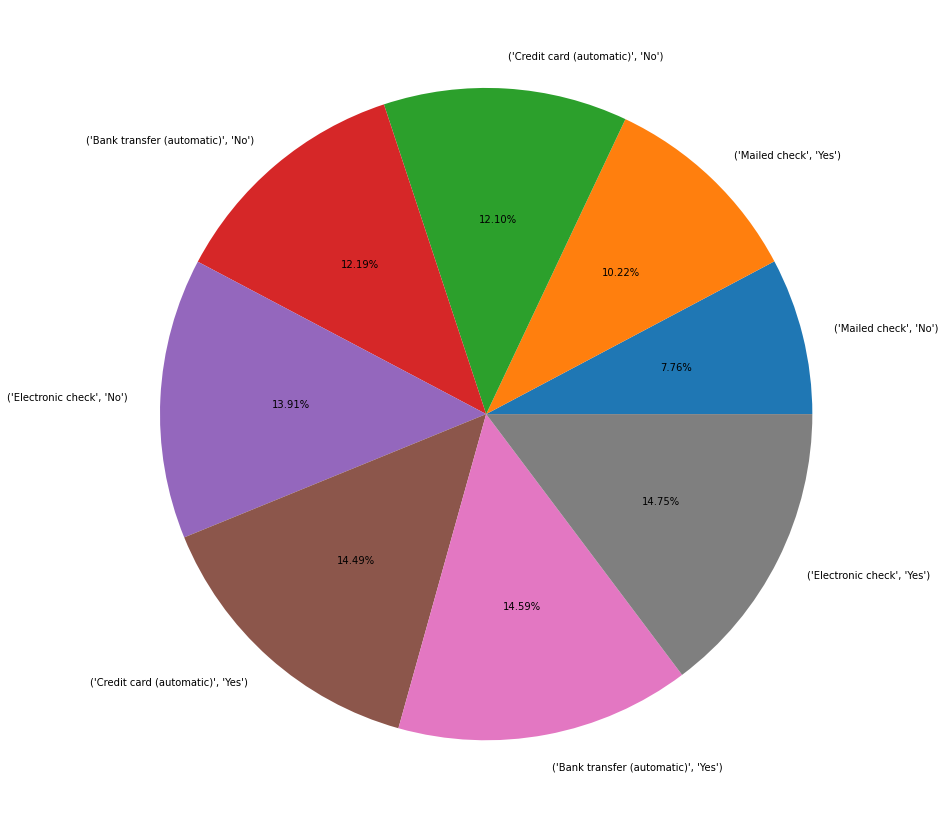

In [122]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [123]:
df.groupby(["PaymentMethod","Churn"])['MonthlyCharges'].mean()

PaymentMethod              Churn
Bank transfer (automatic)  No       65.049417
                           Yes      77.875581
Credit card (automatic)    No       64.562209
                           Yes      77.356034
Electronic check           No       74.232032
                           Yes      78.700980
Mailed check               No       41.403911
                           Yes      54.557143
Name: MonthlyCharges, dtype: float64

# Observations:
1. Avg Monthly charges for Electronic check who churn is maximum : 78.700980
2. Avg Monthly charges for Mailed check who do not churn is minimum : 41.403911



<AxesSubplot:xlabel='PaperlessBilling', ylabel='MonthlyCharges'>

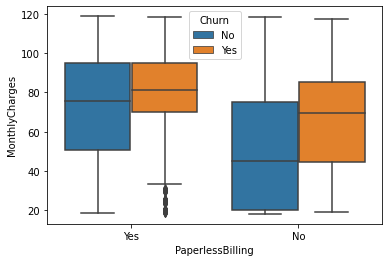

In [124]:
sns.boxplot(x=df['PaperlessBilling'],y=df['MonthlyCharges'],hue=df['Churn'])

In [125]:
df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].mean()

PaperlessBilling  Churn
No                No       49.813962
                  Yes      63.157463
Yes               No       71.195525
                  Yes      78.221429
Name: MonthlyCharges, dtype: float64

# Observations:
1. Avg Monthly charges for PaperlessBilling who churn is maximum : 78.221429
2. Avg Monthly charges for No PaperlessBilling who do not churn is minimum : 49.813962



In [126]:
label_df=df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].mean().sort_values().index

In [127]:
val_df=df.groupby(["PaperlessBilling","Churn"])['MonthlyCharges'].mean().sort_values().values

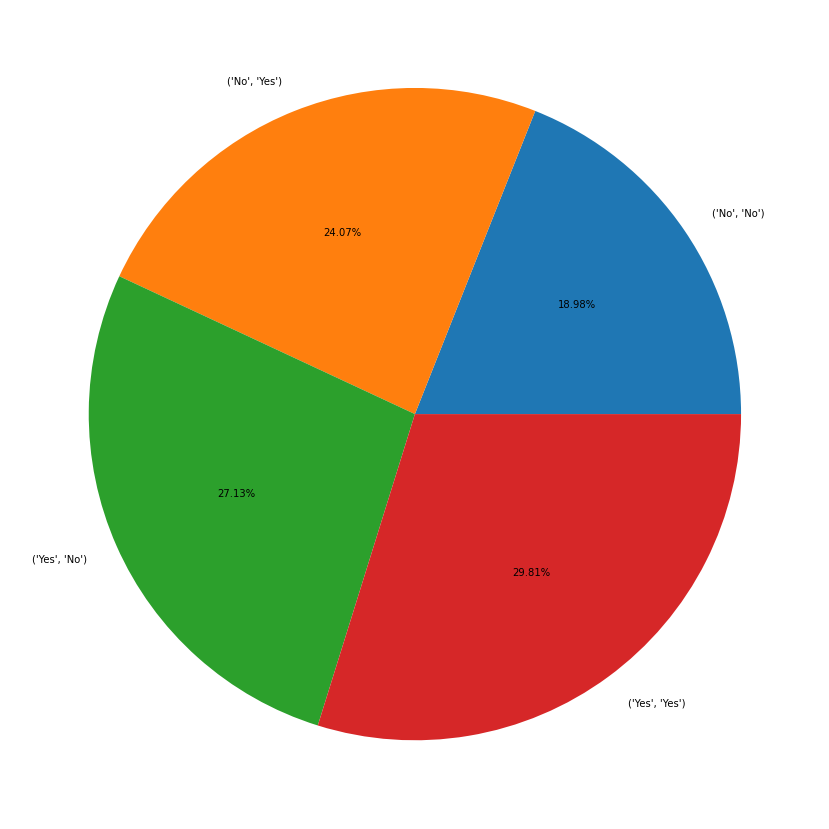

In [128]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [129]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [130]:
def Convert(val):
    val=str(val)
    
    if val=="\n":
        return float(0)
    elif val==" ":
        return float(0)
    else:
        return float(val)

In [131]:
df['TotalCharges']=df['TotalCharges'].apply(Convert)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

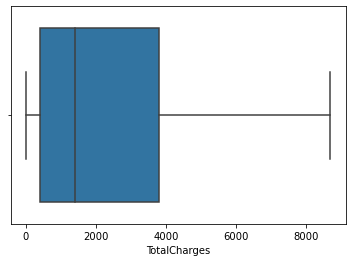

In [132]:
sns.boxplot(df['TotalCharges'])

In [133]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

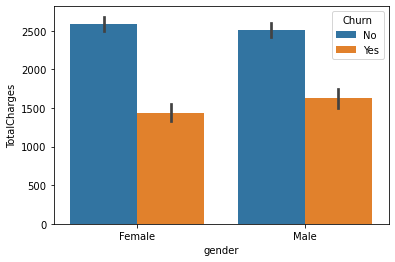

In [134]:
sns.barplot(x='gender',y='TotalCharges',data=df,hue='Churn')

In [135]:
df.groupby(["gender","Churn"])['TotalCharges'].mean()

gender  Churn
Female  No       2588.966046
        Yes      1440.979499
Male    No       2511.987562
        Yes      1623.491559
Name: TotalCharges, dtype: float64

In [136]:
label_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values().index

In [137]:
val_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values().values

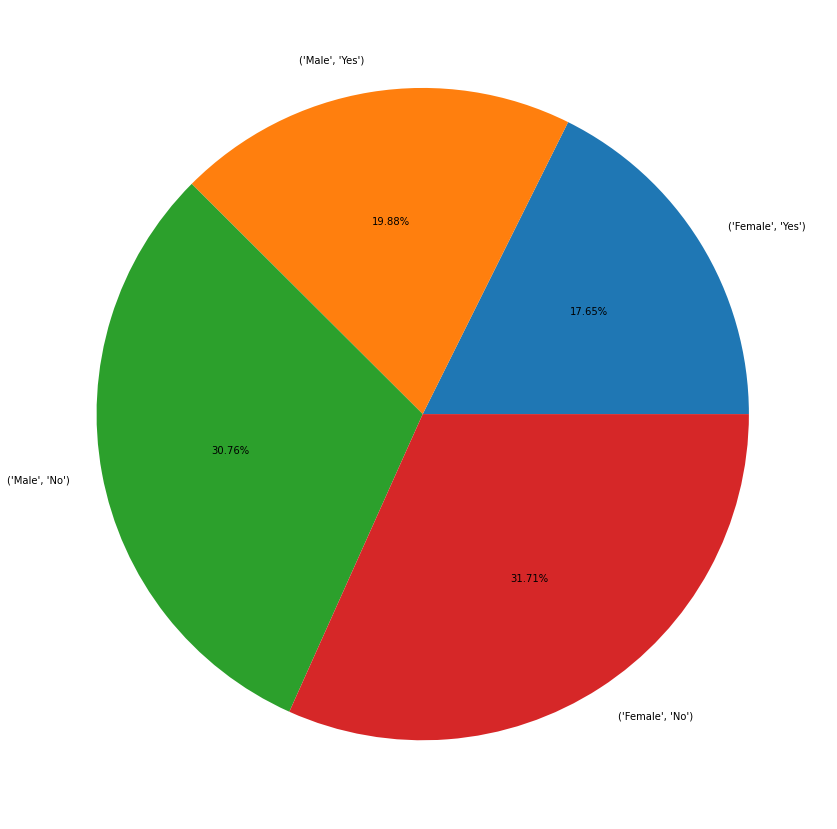

In [138]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers who don't churn has maximum avg total charges : 2588.966046
2. Female Customers who churn has minimum avg total charges : 1440.979499


<AxesSubplot:>

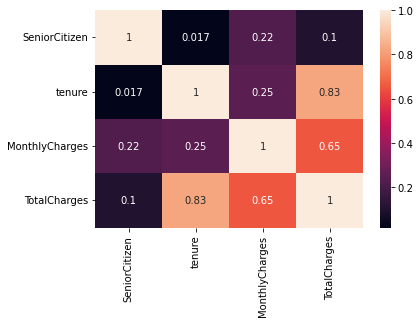

In [139]:
sns.heatmap(df.corr(),annot=True)

In [140]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

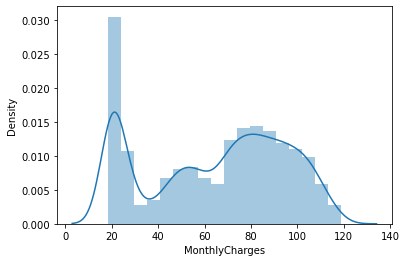

In [141]:
sns.distplot(df['MonthlyCharges'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

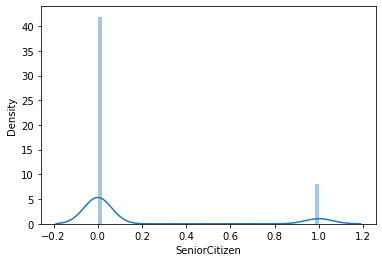

In [142]:
sns.distplot(df['SeniorCitizen'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

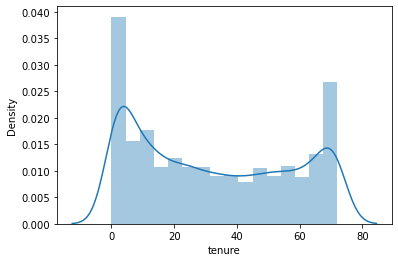

In [143]:
sns.distplot(df['tenure'])

In [144]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:xlabel='PaperlessBilling', ylabel='TotalCharges'>

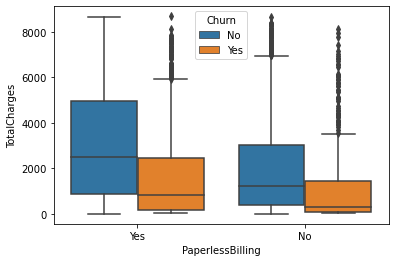

In [145]:
sns.boxplot(x=df['PaperlessBilling'],y=df['TotalCharges'],hue=df['Churn'])

In [146]:
df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].mean()

PaperlessBilling  Churn
No                No       1973.377216
                  Yes      1196.915991
Yes               No       3049.879592
                  Yes      1643.980929
Name: TotalCharges, dtype: float64

In [147]:
label_df=df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].mean().sort_values().index

In [148]:
val_df=df.groupby(["PaperlessBilling","Churn"])['TotalCharges'].mean().sort_values().values

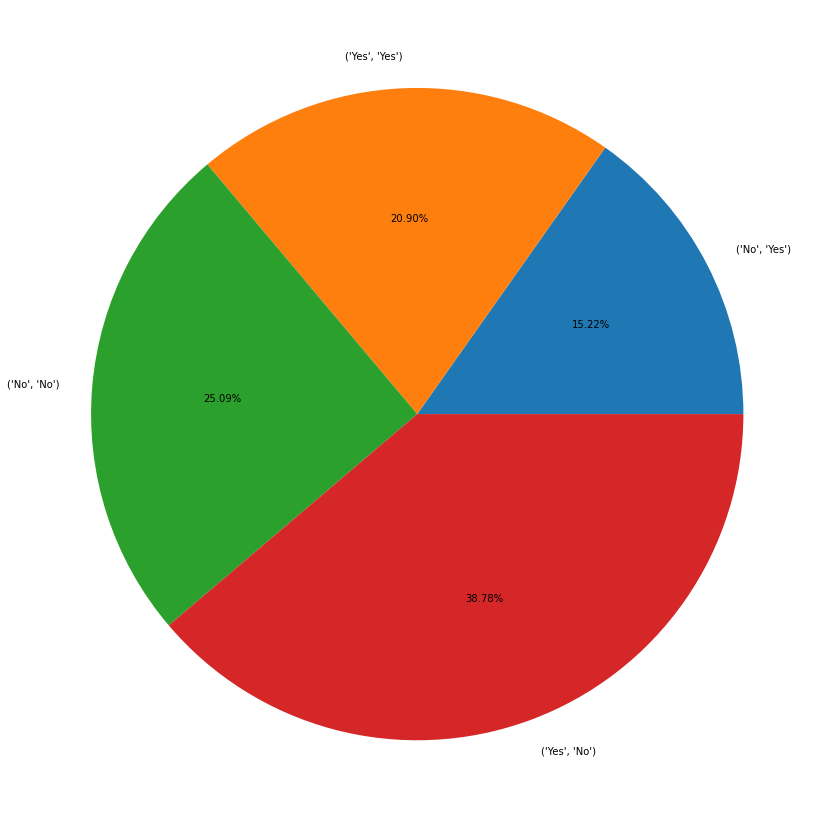

In [149]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have PaperlessBilling service and who don't churn has maximum total bill amount :3049.879592 
2. Customers who don't have PaperlessBilling service and who do churn has minimum total bill amount :1196.915991 


<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

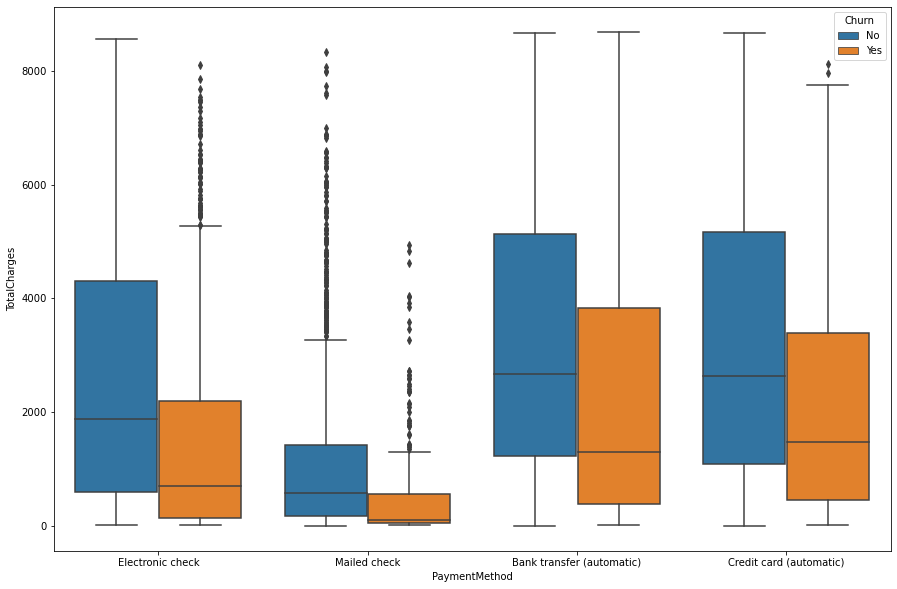

In [150]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['PaymentMethod'],y=df['TotalCharges'],hue=df['Churn'])

In [151]:
label_df=df.groupby(["PaymentMethod","Churn"])['TotalCharges'].mean().sort_values().index

In [152]:
val_df=df.groupby(["PaymentMethod","Churn"])['TotalCharges'].mean().sort_values().values

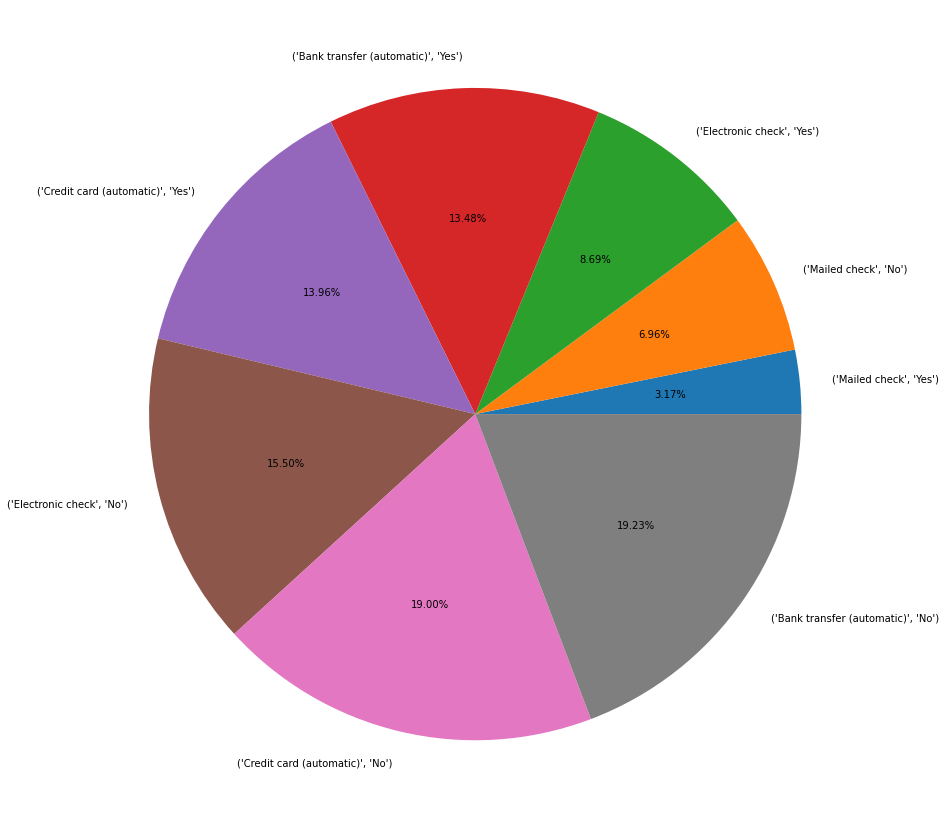

In [153]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [154]:
df.groupby(["PaymentMethod","Churn"])['TotalCharges'].mean()

PaymentMethod              Churn
Bank transfer (automatic)  No       3236.911470
                           Yes      2269.812984
Credit card (automatic)    No       3198.708178
                           Yes      2350.257759
Electronic check           No       2609.989838
                           Yes      1463.656769
Mailed check               No       1170.945744
                           Yes       534.022565
Name: TotalCharges, dtype: float64

# Observations:
1. Customers who have Mailed check payment method service and who do churn has minimum total bill amount :534.022565 
2. Customers who have Bank transfer (automatic) payment method service and who do not churn has maximum total bill amount : 3236.911470


<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

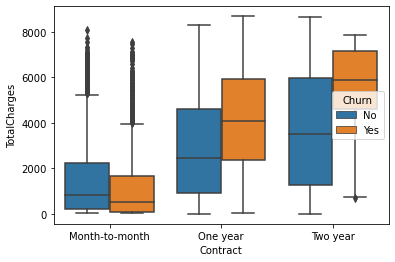

In [155]:
sns.boxplot(x=df['Contract'],y=df['TotalCharges'],hue=df['Churn'])

In [156]:
df.groupby(["Contract","Churn"])['TotalCharges'].mean()

Contract        Churn
Month-to-month  No       1521.927590
                Yes      1164.460574
One year        No       2901.348355
                Yes      4066.212048
Two year        No       3656.648604
                Yes      5432.363542
Name: TotalCharges, dtype: float64

In [157]:
label_df=df.groupby(["Contract","Churn"])['TotalCharges'].mean().sort_values().index

In [158]:
val_df=df.groupby(["Contract","Churn"])['TotalCharges'].mean().sort_values().values

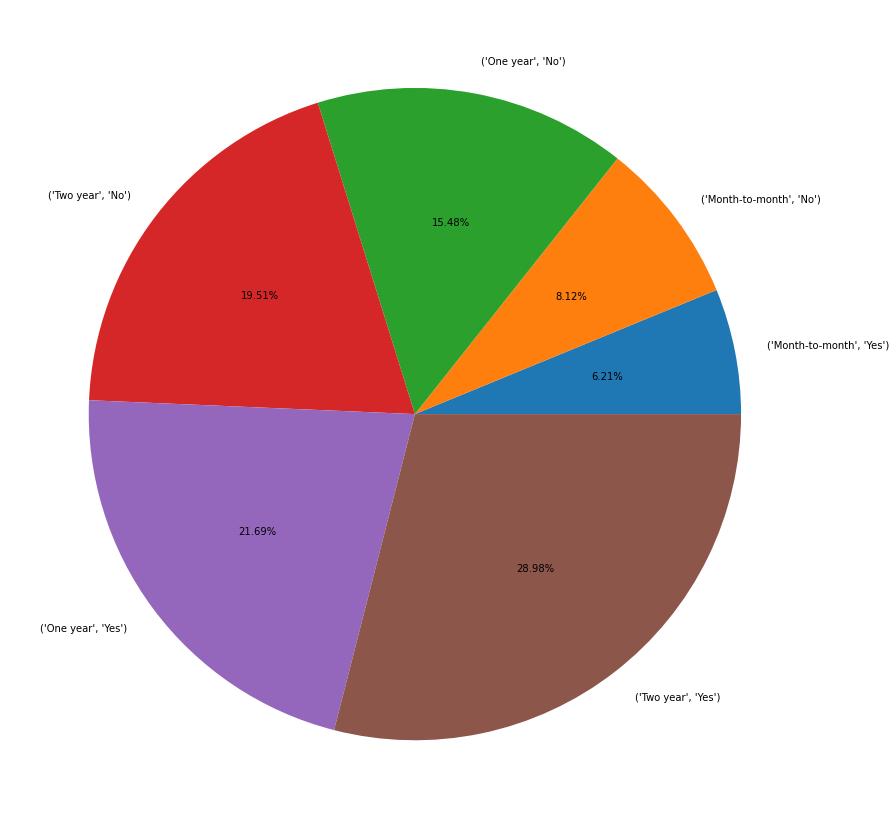

In [159]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have Contract of one year and who do churn has maximum total bill amount :4066.212048 
2. Customers who have Contract of month to month and who do churn has minimum total bill amount :1164.460764

<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

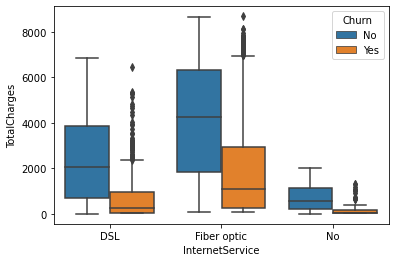

In [160]:
sns.boxplot(x=df['InternetService'],y=df['TotalCharges'],hue=df['Churn'])

In [161]:
df.groupby(["InternetService","Churn"])['TotalCharges'].mean()

InternetService  Churn
DSL              No       2426.806498
                 Yes       784.349673
Fiber optic      No       4135.834074
                 Yes      1914.616384
No               No        701.685740
                 Yes       173.919912
Name: TotalCharges, dtype: float64

In [162]:
label_df=df.groupby(["InternetService","Churn"])['TotalCharges'].mean().sort_values().index

In [163]:
val_df=df.groupby(["InternetService","Churn"])['TotalCharges'].mean().sort_values().values

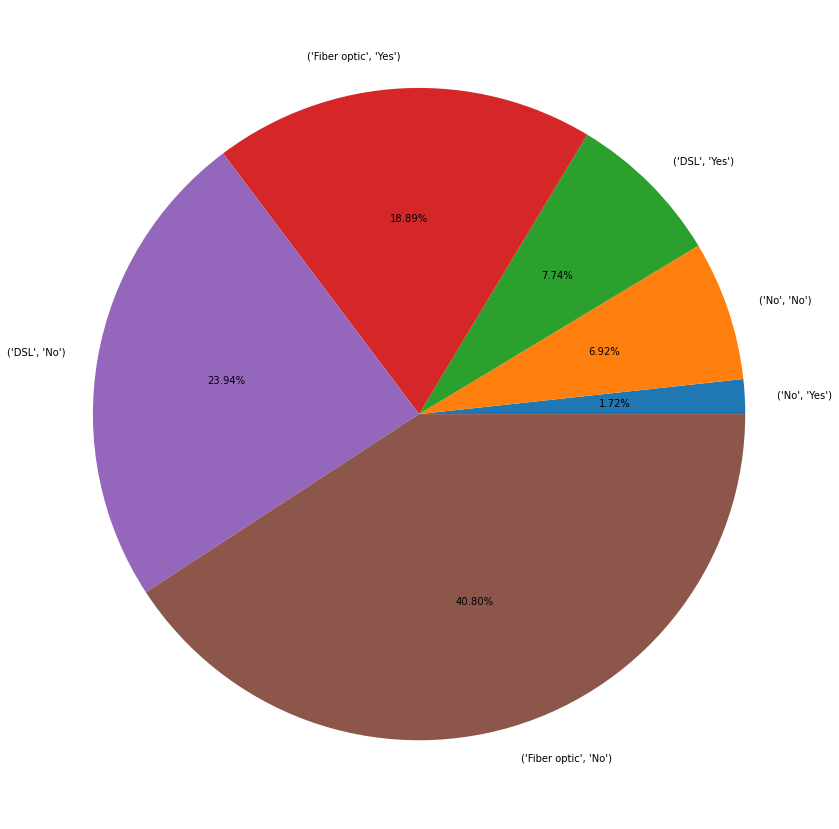

In [164]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers who have InternetService Fiber Optic and who do not churn has maximum total bill amount :4135.834074 
2. Customers who have no InternetService and who do churn has minimum total bill amount :173.919912

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

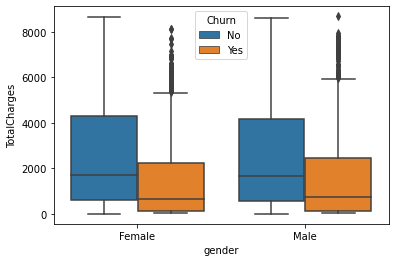

In [165]:
sns.boxplot(x=df['gender'],y=df['TotalCharges'],hue=df['Churn'])

In [166]:
df.groupby(["gender","Churn"])['TotalCharges'].mean()

gender  Churn
Female  No       2588.966046
        Yes      1440.979499
Male    No       2511.987562
        Yes      1623.491559
Name: TotalCharges, dtype: float64

In [167]:
label_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values().index

In [168]:
val_df=df.groupby(["gender","Churn"])['TotalCharges'].mean().sort_values().values

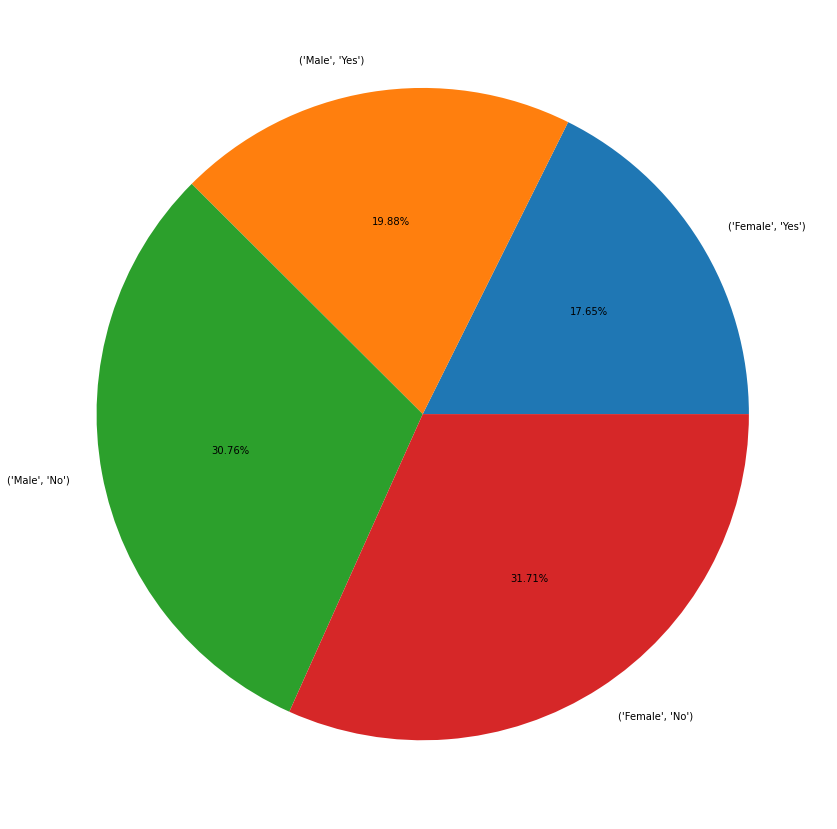

In [169]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Female Customers who do not churn has maximum total charges : 2588.966046
2. Female Customers who churn has minimum total charges : 1440.979499


In [170]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [171]:
le=LabelEncoder()


In [172]:
df['gender']=le.fit_transform(df['gender'])


In [173]:
df['Partner']=le.fit_transform(df['Partner'])


In [174]:
df['Dependents']=le.fit_transform(df['Dependents'])


In [175]:
df['PhoneService']=le.fit_transform(df['PhoneService'])

In [176]:
df['MultipleLines']=le.fit_transform(df['MultipleLines'])

In [177]:
df['InternetService']=le.fit_transform(df['InternetService'])

In [178]:
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])

In [179]:
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])

In [180]:
df['TechSupport']=le.fit_transform(df['TechSupport'])

In [181]:
df['StreamingTV']=le.fit_transform(df['StreamingTV'])

In [182]:
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])

In [183]:
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])

In [184]:
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

In [185]:
df['Contract']=le.fit_transform(df['Contract'])

In [186]:
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])

In [187]:
df['Churn']=le.fit_transform(df['Churn'])

In [188]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [189]:
df.drop('customerID',axis=1,inplace=True)

In [190]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [191]:
y=df['Churn']

In [192]:
X=df.drop('Churn',axis=1)

In [193]:
sc=StandardScaler()

In [194]:
X=sc.fit_transform(X)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [196]:
X_train.shape

(5634, 19)

# LogisticRegression

In [197]:
lr=LogisticRegression()

In [198]:
lr.fit(X_train,y_train)

LogisticRegression()

In [199]:
y_pred=lr.predict(X_train)


# Accuracy score of training data 

In [200]:
accuracy_score(y_train,y_pred)

0.8003194888178914

In [201]:
mean_squared_error(y_train,y_pred)

0.19968051118210864

In [202]:
y_pred=lr.predict(X_test)

# Accuracy score of testing data

In [203]:
accuracy_score(y_test,y_pred)

0.815471965933286

In [204]:
mean_squared_error(y_test,y_pred)

0.18452803406671398

In [205]:
confusion_matrix(y_test,y_pred)

array([[933, 103],
       [157, 216]], dtype=int64)

In [206]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [207]:
kf=KFold(5)

In [208]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [209]:
scores=cross_val_score(lr,X,y,cv=kf)

In [210]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.8055358410220014
2 0.8133427963094393
3 0.7892122072391767
4 0.7990056818181818
5 0.8053977272727273


In [211]:
average_score=scores.mean()

In [212]:
average_score

0.8024988507323053

# RandomForestClassifier

In [213]:
rfc=RandomForestClassifier()


In [214]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [215]:
y_pred=rfc.predict(X_train)


# Accuracy score of training data 

In [216]:
accuracy_score(y_train,y_pred)

0.9982250621228257

In [217]:
mean_squared_error(y_train,y_pred)

0.001774937877174299

In [218]:
y_pred=lr.predict(X_test)

# Accuracy score of testing data

In [219]:
accuracy_score(y_test,y_pred)

0.815471965933286

In [220]:
mean_squared_error(y_test,y_pred)

0.18452803406671398

In [221]:
rfc.predict_proba(X_test)

array([[0.25, 0.75],
       [0.96, 0.04],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.95, 0.05],
       [0.48, 0.52]])

In [222]:
confusion_matrix(y_test,y_pred)

array([[933, 103],
       [157, 216]], dtype=int64)

In [223]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [224]:
kf=KFold(5)

In [225]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [226]:
scores=cross_val_score(rfc,X,y,cv=kf)

In [227]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.7977288857345636
2 0.7927608232789212
3 0.7764371894960965
4 0.7876420454545454
5 0.7940340909090909


In [228]:
average_score=scores.mean()

In [229]:
average_score

0.7897206069746435

# Decision Tree Classifier

In [230]:
dtc=DecisionTreeClassifier()


In [231]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [232]:
y_pred=dtc.predict(X_train)


# Accuracy score of training data 

In [233]:
accuracy_score(y_train,y_pred)

0.9985800496982605

In [234]:
mean_squared_error(y_train,y_pred)

0.0014199503017394391

In [235]:
y_pred=dtc.predict(X_test)

# Accuracy score of testing data

In [236]:
accuracy_score(y_test,y_pred)

0.7274662881476224

In [237]:
mean_squared_error(y_test,y_pred)

0.27253371185237757

In [238]:
dtc.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [239]:
confusion_matrix(y_test,y_pred)

array([[832, 204],
       [180, 193]], dtype=int64)

In [240]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.49      0.52      0.50       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [241]:
kf=KFold(5)

In [242]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [243]:
scores=cross_val_score(dtc,X,y,cv=kf)

In [244]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.7473385379701917
2 0.7224982256919801
3 0.7118523775727467
4 0.71875
5 0.7400568181818182


In [245]:
average_score=scores.mean()

In [246]:
average_score

0.7280991918833474

# KNeighborsClassifier

In [247]:
knc=KNeighborsClassifier()


In [248]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [249]:
y_pred=knc.predict(X_train)


# Accuracy score of training data 

In [250]:
accuracy_score(y_train,y_pred)

0.8306709265175719

In [251]:
mean_squared_error(y_train,y_pred)

0.16932907348242812

In [252]:
y_pred=knc.predict(X_test)

# Accuracy score of testing data

In [253]:
accuracy_score(y_test,y_pred)

0.7572746628814763

In [254]:
mean_squared_error(y_test,y_pred)

0.2427253371185238

In [255]:
knc.predict_proba(X_test)

array([[0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6]])

In [256]:
confusion_matrix(y_test,y_pred)

array([[879, 157],
       [185, 188]], dtype=int64)

In [257]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.54      0.50      0.52       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.75      1409



In [258]:
kf=KFold(5)

In [259]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [260]:
scores=cross_val_score(knc,X,y,cv=kf)

In [261]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.7686302342086586
2 0.7615330021291696
3 0.7395315826827538
4 0.7421875
5 0.7556818181818182


In [262]:
average_score=scores.mean()

In [263]:
average_score

0.7535128274404801

# GradientBoostingClassifier

In [264]:
gbc=GradientBoostingClassifier()


In [265]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [266]:
y_pred=gbc.predict(X_train)

# Accuracy score of training data 

In [267]:
accuracy_score(y_train,y_pred)

0.8272985445509408

In [268]:
mean_squared_error(y_train,y_pred)

0.1727014554490593

In [269]:
y_pred=knc.predict(X_test)

# Accuracy score of testing data

In [270]:
accuracy_score(y_test,y_pred)

0.7572746628814763

In [271]:
mean_squared_error(y_test,y_pred)

0.2427253371185238

In [272]:
confusion_matrix(y_test,y_pred)

array([[879, 157],
       [185, 188]], dtype=int64)

In [273]:
gbc.predict_proba(X_test)

array([[0.27246973, 0.72753027],
       [0.89817144, 0.10182856],
       [0.98236547, 0.01763453],
       ...,
       [0.94166405, 0.05833595],
       [0.96649641, 0.03350359],
       [0.33785254, 0.66214746]])

In [274]:
mean_squared_error(y_test,y_pred)

0.2427253371185238

In [275]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.54      0.50      0.52       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.76      0.75      1409



In [276]:
kf=KFold(5)

In [277]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [278]:
scores=cross_val_score(gbc,X,y,cv=kf)

In [279]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.8105039034776437
2 0.8048261178140526
3 0.7913413768630234
4 0.8075284090909091
5 0.8032670454545454


In [280]:
average_score=scores.mean()

In [281]:
average_score

0.8034933705400349

# XGBoost Classifier

In [282]:
xgb_i=xgb.XGBClassifier()


In [283]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [284]:
y_pred=xgb_i.predict(X_train)


# Accuracy score of training data 

In [285]:
accuracy_score(y_train,y_pred)

0.9332623358182464

In [286]:
mean_squared_error(y_train,y_pred)

0.06673766418175364

In [287]:
y_pred=xgb_i.predict(X_test)

# Accuracy score of testing data

In [288]:
accuracy_score(y_test,y_pred)

0.7906316536550745

In [289]:
mean_squared_error(y_test,y_pred)

0.2093683463449255

In [290]:
confusion_matrix(y_test,y_pred)

array([[931, 105],
       [190, 183]], dtype=int64)

In [291]:
mean_squared_error(y_test,y_pred)

0.2093683463449255

In [292]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [293]:
kf=KFold(5)

In [294]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [295]:
scores=cross_val_score(xgb_i,X,y,cv=kf)

In [296]:
for fold_idx,score in enumerate(scores,start=1):
    print(fold_idx,score)

1 0.7743080198722498
2 0.7927608232789212
3 0.7806955287437899
4 0.7755681818181818
5 0.7876420454545454


In [297]:
average_score=scores.mean()

In [298]:
average_score

0.7821949198335376

# We will choose Logistic Regression Model because of no overfitting probelm
# Accuracy score of Logistic Regression Model for traning and testing is almost similar.